### Mean-Variance Potfolio Optimization with Elastic Net Penalty

Utilizes Pylops: python library of linear operators for inverse problems

In [1]:
import pylops 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nx = 101
x = np.zeros(nx)
x[: nx // 2] = 10
x[nx // 2 : 3 * nx // 4] = -5

Iop = pylops.Identity(nx)

n = np.random.normal(0, 1, nx)
y = Iop * (x + n)

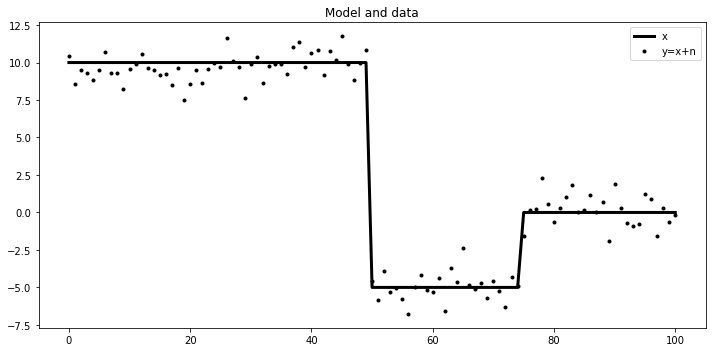

In [3]:
plt.figure(figsize=(10, 5))
plt.plot(x, "k", lw=3, label="x")
plt.plot(y, ".k", label="y=x+n")
plt.legend()
plt.title("Model and data")
plt.tight_layout()

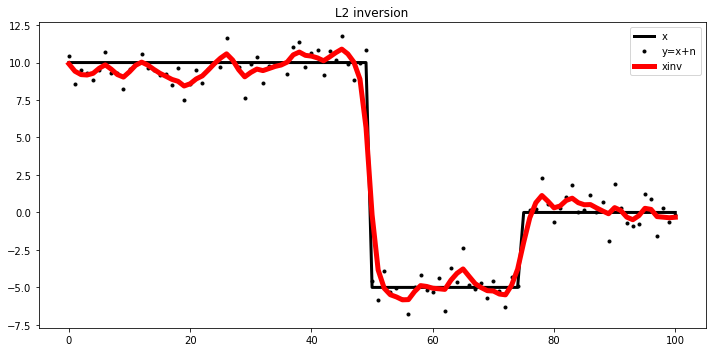

In [4]:
D2op = pylops.SecondDerivative(nx, edge=True)
lamda = 1e2

xinv = pylops.optimization.leastsquares.regularized_inversion(
    Iop, y, [D2op], **dict(iter_lim=30)
)[0]

plt.figure(figsize=(10, 5))
plt.plot(x, "k", lw=3, label="x")
plt.plot(y, ".k", label="y=x+n")
plt.plot(xinv, "r", lw=5, label="xinv")
plt.legend()
plt.title("L2 inversion")
plt.tight_layout()

### Application of Sparse Solver Split Bregman Operator

Ref: https://pylops.readthedocs.io/en/latest/api/generated/pylops.optimization.sparsity.splitbregman.html

SplitBregman
-----------------------------------------------------------------
The Operator Op has 101 rows and 101 cols
niter_outer =  50     niter_inner =   3   tol = 1.00e-04
mu = 1.00e+00         epsL1 = [3]	  epsL2 = [1]
-----------------------------------------------------------------
    Itn       x[0]           r2norm           r12norm
     1     9.6056e+00       7.868e+01        1.487e+02
     2     9.5162e+00       8.644e+01        1.508e+02
     3     9.4819e+00       8.386e+01        1.567e+02
     4     9.4684e+00       8.471e+01        1.613e+02
     5     9.4628e+00       8.413e+01        1.632e+02
     6     9.4600e+00       8.289e+01        1.637e+02
     7     9.4581e+00       8.207e+01        1.635e+02
     8     9.4565e+00       8.139e+01        1.632e+02
     9     9.4547e+00       8.068e+01        1.626e+02
    10     9.4528e+00       8.009e+01        1.620e+02
    11     9.4508e+00       7.962e+01        1.616e+02
    21     9.4333e+00       7.767e+01        1.59

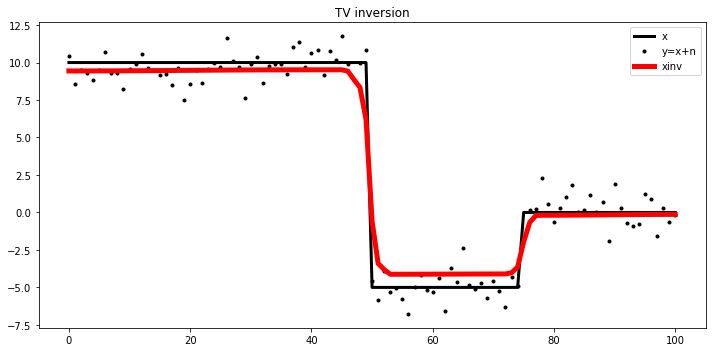

In [31]:
# identity operator on data 
Iop = pylops.Identity(nx)

# define first derivative operator
Dop = pylops.FirstDerivative(nx, edge=True, kind="backward")

# dampening param on mse; wlog take 1
mu = 1

# epsr1
lambda1 = 3

# eps2
lambda2=1

# iterations for opt
niter_out = 50
niter_in = 3

xinv = pylops.optimization.sparsity.splitbregman(
    Op=Iop,
    y=y,
    RegsL1=[Dop],
    RegsL2=[Dop],
    niter_outer=niter_out,
    niter_inner=niter_in,
    mu=mu,
    epsRL1s=[lambda1],
    epsRL2s=[lambda2],
    tol=1e-4,
    tau=1.0,
    show=True,
    **dict(iter_lim=30, damp=1e-10)
)[0]

plt.figure(figsize=(10, 5))
plt.plot(x, "k", lw=3, label="x")
plt.plot(y, ".k", label="y=x+n")
plt.plot(xinv, "r", lw=5, label="xinv")
plt.legend()
plt.title("TV inversion")
plt.tight_layout()

In [32]:
xinv

array([ 9.43951021,  9.43972488,  9.44015422,  9.44079814,  9.44165635,
        9.44272819,  9.44401241,  9.44550686,  9.44720827,  9.44911192,
        9.45121135,  9.45349812,  9.45596155,  9.45858859,  9.46136366,
        9.46426867,  9.46728305,  9.47038393,  9.47354635,  9.47674364,
        9.47994783,  9.48313016,  9.4862617 ,  9.48931392,  9.49225938,
        9.49507238,  9.49772964,  9.50021084,  9.50249921,  9.50458196,
        9.50645059,  9.50810112,  9.50953413,  9.51075467,  9.51177204,
        9.51259934,  9.513253  ,  9.51375202,  9.51411742,  9.51437124,
        9.51453573,  9.51463243,  9.51468055,  9.51469887,  9.51470175,
        9.51470011,  9.42580517,  8.86881593,  8.34338279,  6.20161914,
       -0.58328201, -3.40721686, -3.81004358, -4.12342505, -4.12307135,
       -4.12250097, -4.12173105, -4.12076556, -4.11964027, -4.11837216,
       -4.11698798, -4.1155176 , -4.11399218, -4.11244592, -4.11091104,
       -4.10942274, -4.10801342, -4.1067149 , -4.1055564 , -4.10